# Exercise 12.1 - Solution
## Weights and activations of a convolutional network:
This task consists of two parts. First, set up and evaluate a
convolutional neural network.
 1. Set up and train a convolutional network on the classification of images (data set CIFAR-10). Train your network to at least 70% test accuracy.
  - Plot the confusion matrix. What do you observe?
  - Plot several falsely classified images along with the predicted class scores. What kinds of misclassification do you observe, why do they occur?
 2. Plot the filter weights in the first layer of your network and see if you can make any sense of it.
 3. Visualize the activations in the first two layers of your network for two input images of choice and describe what you see.
  - Does it meet your expectations?


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

layers = keras.layers
print("keras", keras.__version__)

### Download CIFAR-10 data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train = (x_train - 128.) / 128.
x_test = (x_test - 128.) / 128.

In [4]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### Design, train, and evaluate a simple CNN

In [5]:
model = keras.models.Sequential([
    layers.Convolution2D(36, kernel_size=(5, 5), padding="same", activation='elu', input_shape=(32, 32, 3)),
    layers.Convolution2D(36, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.Convolution2D(64, kernel_size=(3, 3), padding="same", strides=(2, 2), activation='elu'),
    layers.Convolution2D(64, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.Convolution2D(128, kernel_size=(3, 3), padding="same", strides=(2, 2), activation='elu'),
    layers.Convolution2D(128, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
    ])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 36)        2736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 36)        11700     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        20800     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=1e-3),
    metrics=['accuracy'])

results = model.fit(x_train, y_train_one_hot,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1,
                    callbacks = [keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1, min_lr=1e-5)],
                    )

Epoch 1/15
1407/1407 [==============================] - 163s 116ms/step - loss: 1.9630 - accuracy: 0.2757 - val_loss: 1.5141 - val_accuracy: 0.4338
Epoch 2/15
1407/1407 [==============================] - 168s 119ms/step - loss: 1.5973 - accuracy: 0.4262 - val_loss: 1.3729 - val_accuracy: 0.5120
Epoch 3/15
1407/1407 [==============================] - 158s 113ms/step - loss: 1.4911 - accuracy: 0.4604 - val_loss: 1.3506 - val_accuracy: 0.5054
Epoch 4/15
1407/1407 [==============================] - 167s 119ms/step - loss: 1.4449 - accuracy: 0.4783 - val_loss: 1.2741 - val_accuracy: 0.5402
Epoch 5/15
1407/1407 [==============================] - 170s 121ms/step - loss: 1.3981 - accuracy: 0.4965 - val_loss: 1.2670 - val_accuracy: 0.5478
Epoch 6/15
1407/1407 [==============================] - 165s 117ms/step - loss: 1.3723 - accuracy: 0.5051 - val_loss: 1.2424 - val_accuracy: 0.5570
Epoch 7/15
1407/1407 [==============================] - 168s 119ms/step - loss: 1.3452 - accuracy: 0.5173 - val_

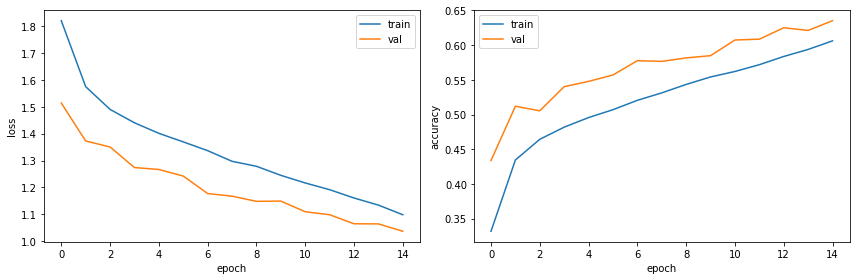

In [7]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()

### Plot predictions
#### Task
Investigate the predictions of the trained model.

In [8]:
def plot_prediction(X, Y, Y_predict, fname=False):
    """
    Plot image X along with predicted probabilities Y_predict.
    X: CIFAR image, shape = (32, 32, 3)
    Y: CIFAR label, one-hot encoded, shape = (10)
    Y_predict: predicted probabilities, shape = (10)
    """
    X = 128 * X + 128
    labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # plot image
    ax1.imshow(X.astype('uint8'), origin='upper')
    ax1.set(xticks=[], yticks=[])

    # plot probabilities
    ax2.barh(np.arange(10), Y_predict, align='center')
    ax2.set(xlim=(0, 1), xlabel='Score', yticks=[])

    for i in range(10):
        c = 'red' if (i == np.argmax(Y)) else 'black'
        ax2.text(0.05, i, labels[i].capitalize(), ha='left', va='center', color=c)


In [9]:
y_pred = model.predict(x_test, verbose=1).squeeze()

313/313 [==============================] - 11s 36ms/step


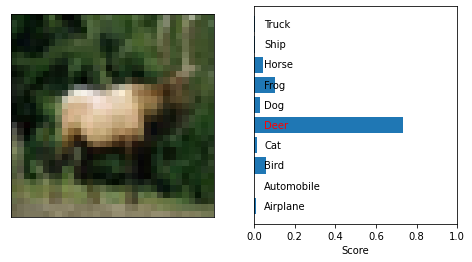

In [10]:
idx_1 = np.random.choice(len(x_test), 1)[0]
plot_prediction(x_test[idx_1], y_test_one_hot[idx_1], y_pred[idx_1])

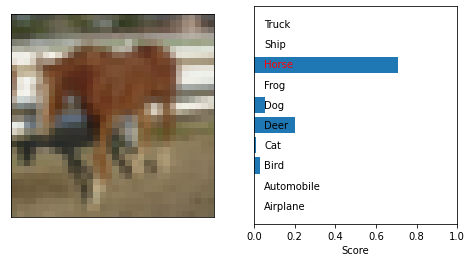

In [11]:
idx_2 = np.random.choice(len(x_test), 1)[0]
plot_prediction(x_test[idx_2], y_test_one_hot[idx_2], y_pred[idx_2])

### Plot confusion matrix
#### Task
Plot the confusion matrix and comment on your findings

In [12]:
def plot_confusion(Y_true, Y_predict, fname=False):
    """
    Plot confusion matrix
    Y_true:    array of true classifications (0-9), shape = (N)
    Y_predict: array of predicted classifications (0-9), shape = (N)
    """
    labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck'])
    C = np.histogram2d(Y_true, Y_predict, bins=np.linspace(-0.5, 9.5, 11))[0]
    Cn = C / np.sum(C, axis=1)

    fig = plt.figure(figsize=(8, 8))
    plt.imshow(Cn, interpolation='nearest', vmin=0, vmax=1, cmap=plt.cm.YlGnBu)
    plt.colorbar()
    plt.xlabel('prediction')
    plt.ylabel('truth')
    plt.xticks(range(10), labels, rotation='vertical')
    plt.yticks(range(10), labels)

    for x in range(10):

        for y in range(10):
            plt.annotate('%i' % C[x, y], xy=(y, x), ha='center', va='center')

    plt.tight_layout()

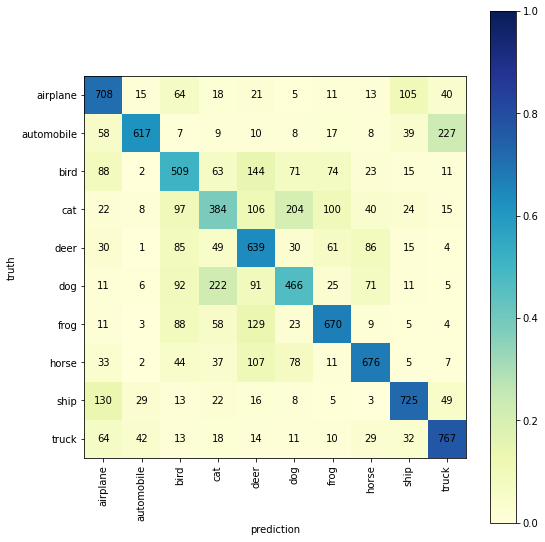

In [13]:
y_predict_cl = np.argmax(y_pred, axis=1)
y_test_cl = np.argmax(y_test_one_hot, axis=1)

plot_confusion(y_test_cl, y_predict_cl)

*The most misclassifications occur for classes that share similar features in the CNN.
Samples of these classes have similar shapes, colors, and structures.
Thus, most misclassifications occur e.g., for cars and trucks, for birds and airplanes (wings), for cats and dogs, or for airplanes and ships (similar background).*

### Plot filter weights of the first layer

Text(0.5, 0.98, '36 convolutional filters')

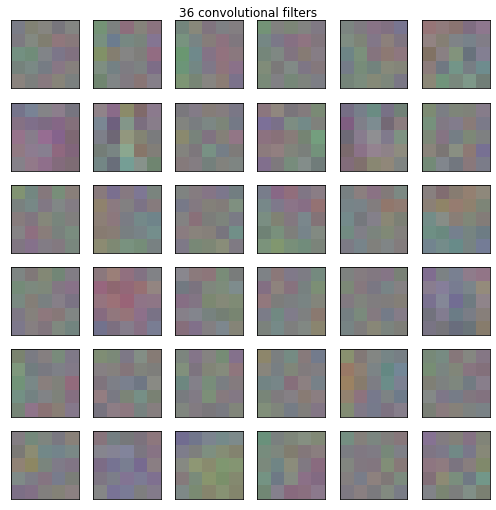

In [14]:
# ----------------------------------------------------------
# Plot the filters in the first convolution layer
# ----------------------------------------------------------
conv1 = model.layers[0]

W1, b1 = conv1.get_weights()
W1 = (W1 * 128 + 128).astype(np.int)

nx, ny, nc, nf = W1.shape
n = np.ceil(nf**.5).astype(int)
fig, axes = plt.subplots(n, n, figsize=(7, 7))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, hspace=0, wspace=0)


for i in range(n**2):
    ax = axes.flat[i]

    if i < nf:
        ax.imshow(W1[..., i], origin='upper')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    else:
        ax.axis('Off')

fig.tight_layout()
fig.suptitle('36 convolutional filters', va='bottom')

### Plot activations in convolutional layers
#### Task
Visualize the filters in the first convolutional layer of your CNN.

In [15]:
def visualize_activation(A, name='conv'):
    nx, ny, nf = A.shape
    n = np.ceil(nf**.5).astype(int)
    fig, axes = plt.subplots(n, n, figsize=(8, 8))
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, hspace=0, wspace=0)

    for i in range(n**2):
        ax = axes.flat[i]

        if i < nf:
            ax.imshow(A[..., i], origin='upper', cmap=plt.cm.Greys)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
        else:
            ax.axis('Off')

    plt.tight_layout()
    fig.suptitle(name, va='bottom')
    plt.show()

#### Task
Visualize the activations in the first two layers of your network for two input images of choice and describe what you see.

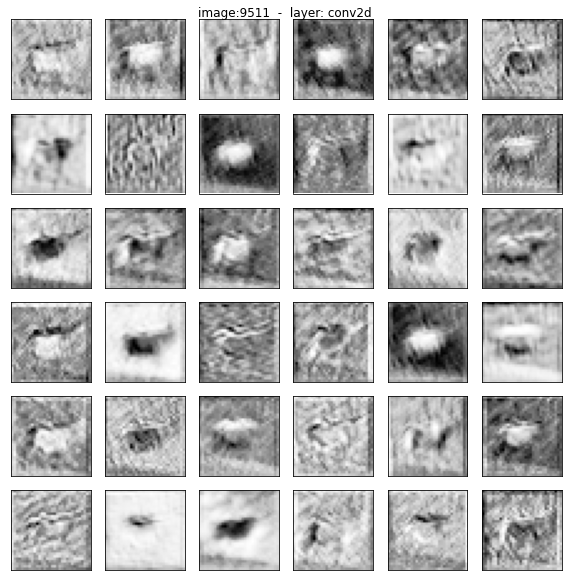

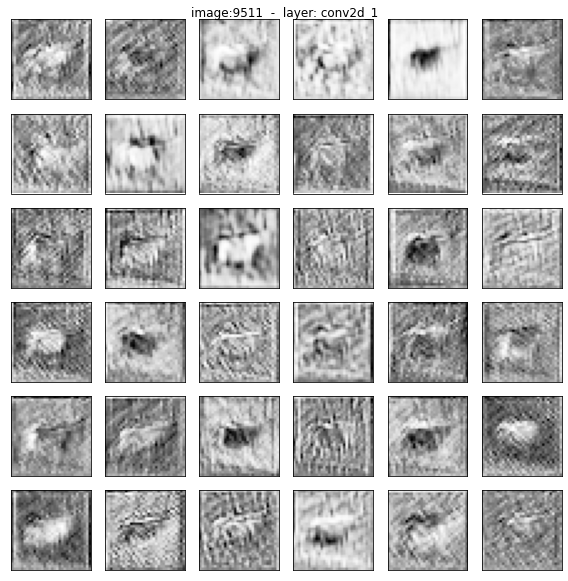

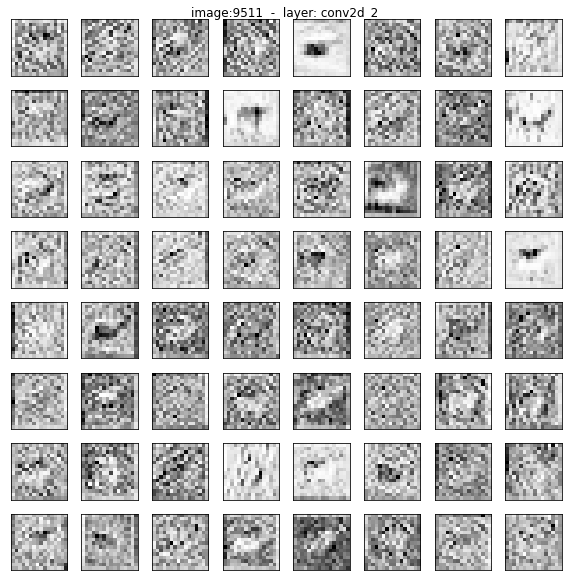

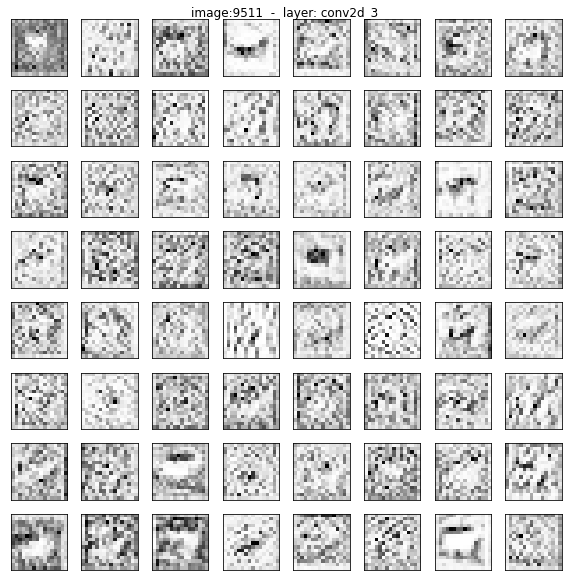

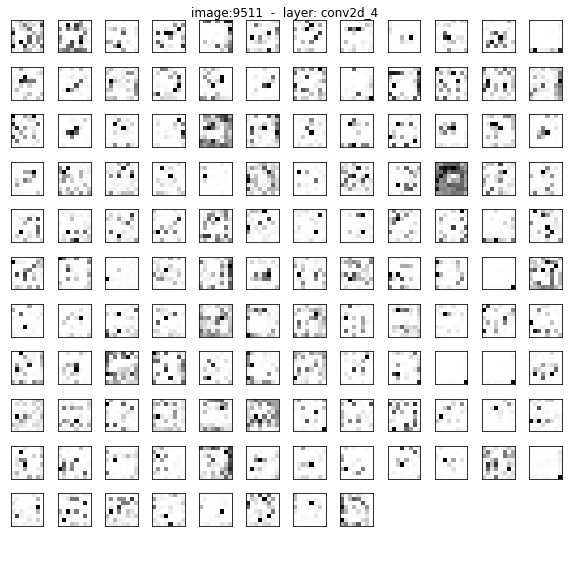

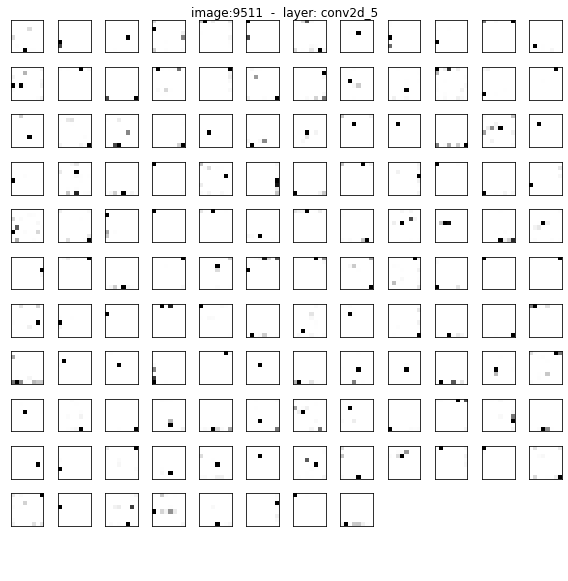

In [17]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # remove annoying TF warnings

conv_layers = [l for l in model.layers if type(l) == layers.Conv2D]

for conv in conv_layers:
    conv_model = keras.models.Model(model.inputs, [conv.output])
    Xin = x_test[idx_1][np.newaxis]
    Xout1 = conv_model.predict(Xin)[0]
    visualize_activation(Xout1, 'image:%i  -  layer: %s' % (idx_1, conv.name))

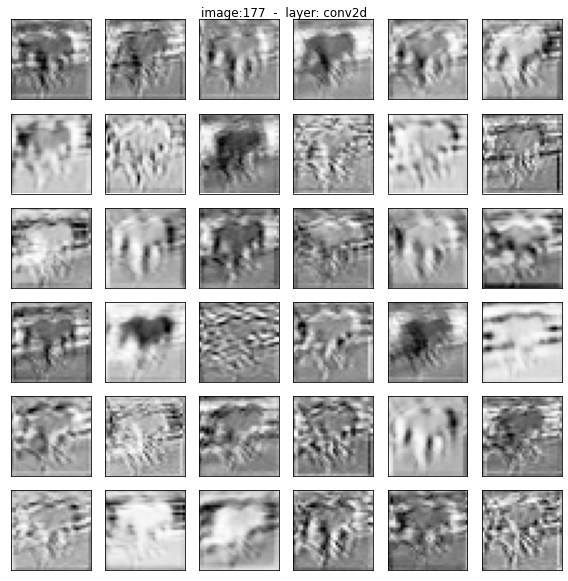

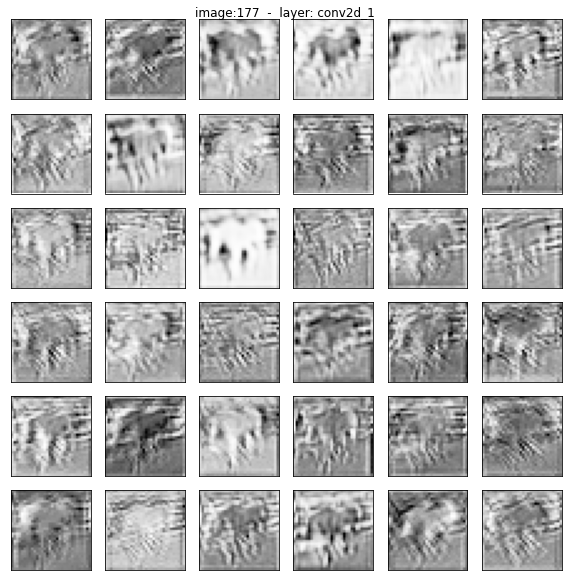

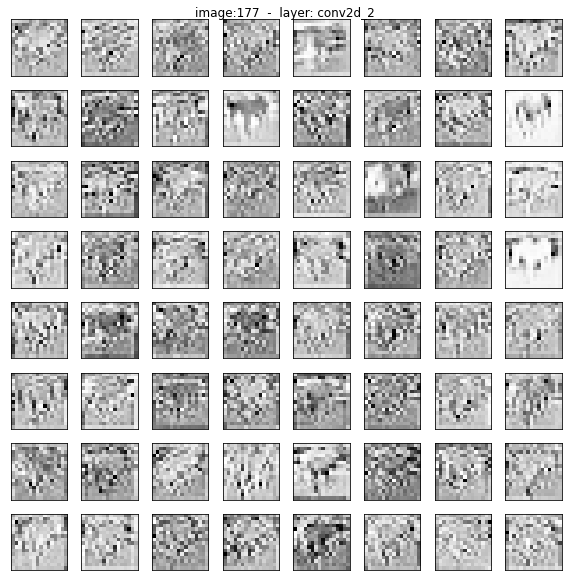

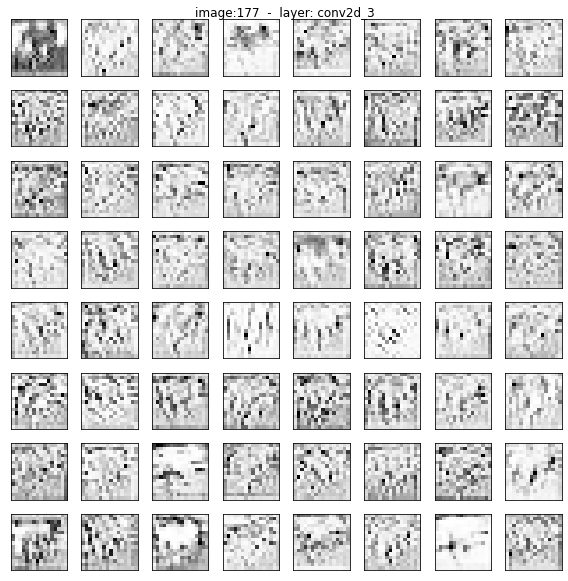

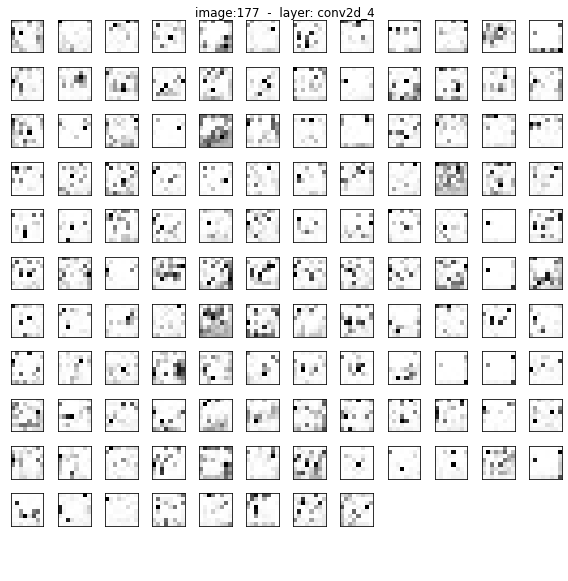

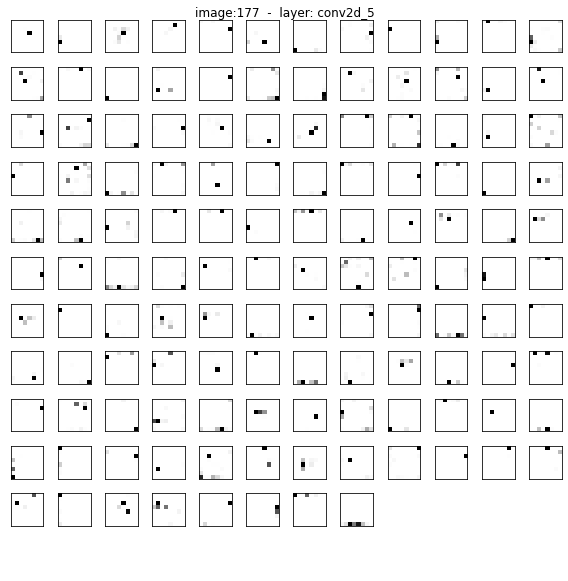

In [18]:
idx = np.random.choice(len(x_test), 1)[0]

for conv in conv_layers:
    conv_model = keras.models.Model(model.inputs, [conv.output])
    Xin = x_test[idx_2][np.newaxis]
    Xout1 = conv_model.predict(Xin)[0]
    visualize_activation(Xout1, 'image:%i  -  layer: %s' % (idx_2, conv.name))

*Whereas in the first few layers, the working principle of the CNN can be somehow, in a sense, be interpreted as a simple application of image [filters from image processing](https://en.wikipedia.org/wiki/Kernel_(image_processing), this is not possible for deeper layers.
To get insights into the working principle of a CNN, more sophistaced methods are needed. Check, e.g., [Exercise 12.2](Exercise_12_2.ipynb).*